In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("911.csv")
df.info()
df.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249737 entries, 0 to 249736
Data columns (total 9 columns):
lat          249737 non-null float64
lng          249737 non-null float64
desc         249737 non-null object
zip          219391 non-null float64
title        249737 non-null object
timeStamp    249737 non-null object
twp          249644 non-null object
addr         249737 non-null object
e            249737 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 17.1+ MB


,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1


In [3]:
temp_list = df["title"].str.split(':').tolist()
cate_list = [i[0] for i in temp_list]
cate_list
df["cate"] = pd.DataFrame(np.array(cate_list).reshape((df.shape[0],1)))
df["timeStamp"] = pd.to_datetime(df["timeStamp"])
df1 = df.set_index("timeStamp")
df1.head(1)

,lat,lng,desc,zip,title,twp,addr,e,cate
timeStamp,,,,,,,,,
2015-12-10 17:10:52,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,NEW HANOVER,REINDEER CT & DEAD END,1,EMS


In [11]:
list(df1.groupby(by="cate"))
type(df1.index[0])


pandas._libs.tslibs.timestamps.Timestamp

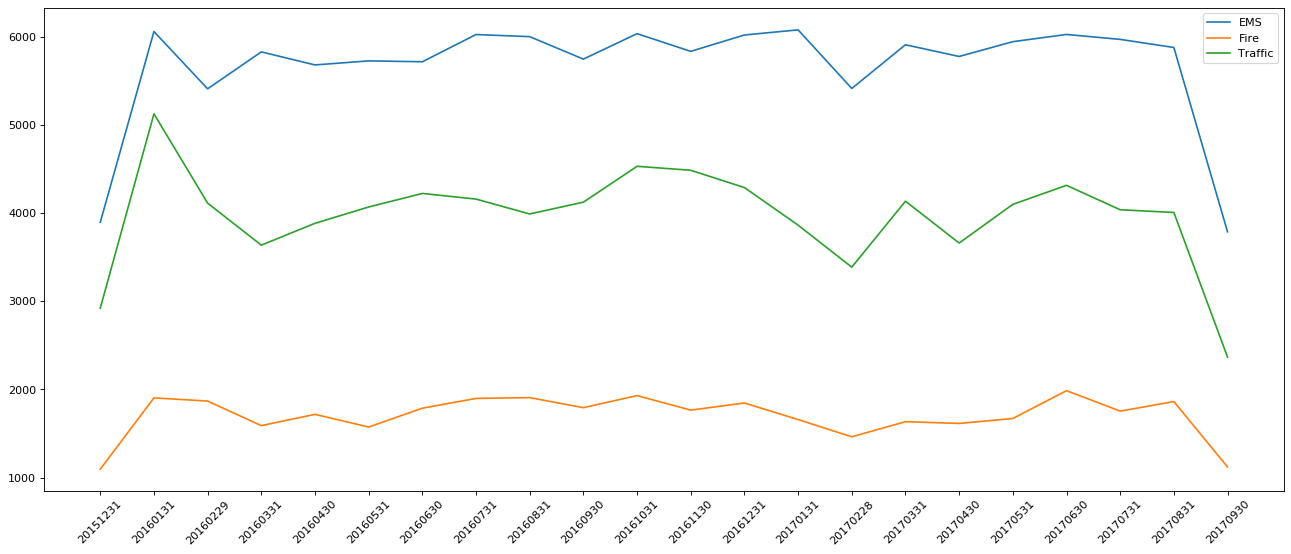

In [7]:

plt.figure(figsize=(20,8), dpi=80)
for group_cate,group_data in df1.groupby(by="cate")["title"]:
    count_data = group_data.resample("M").count()
    _x = count_data.index
    _y = count_data.values
    _x = [i.strftime("%Y%m%d") for i in _x] 
    plt.plot(range(len(_x)), _y, label=group_cate)

plt.xticks(range(len(_x)), _x, rotation=45 )
plt.legend()
plt.show()

In [8]:
type(_x)

list